<a href="https://colab.research.google.com/github/TongHere/Topic-Modeling_LDA/blob/main/Topic_Modeling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Loading Data

In [ ]:
import zipfile
import pandas as pd
import os

In [ ]:
# Read the CSV file into a pandas DataFrame
text = pd.read_excel("/content/text.xlsx")
# Print head
text.head()

,text
0,The virtual spaces where intellectual propert...
1,"In this presentation, the various cultural fa..."
2,The aim of this presentation is to buttress t...
3,The article analyzes the problems of comparati...
4,Lee Strang’s Originalism’s Promise: A Natural...


#Step 2: Data Cleaning

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
text['text_processed'] = \
text['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
text['text_processed'] = \
text['text'].map(lambda x: x.lower())

# Print out the first rows of papers
text['text_processed'].head()

0     the virtual spaces where intellectual propert...
1     in this presentation, the various cultural fa...
2     the aim of this presentation is to buttress t...
3    the article analyzes the problems of comparati...
4     lee strang’s originalism’s promise: a natural...
Name: text_processed, dtype: object

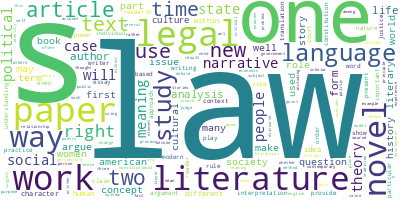

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#Prepare data for LDA Analysis

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = text.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['virtual', 'spaces', 'intellectual', 'property', 'ip', 'meets', 'artificial', 'intelligence', 'ai', 'shaping', 'future', 'work', 'creative', 'industry', 'firms', 'employ', 'ai', 'plan', 'edit', 'remix', 'artistic', 'literary', 'works', 'cases', 'ranging', 'computer', 'games', 'graphics', 'short', 'stories']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 16), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


#LDA model training

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.014*"law" + 0.006*"legal" + 0.004*"theory" + 0.004*"study" + 0.004*"one" '
  '+ 0.003*"article" + 0.003*"paper" + 0.003*"literature" + '
  '0.003*"constitutional" + 0.003*"work"'),
 (1,
  '0.008*"legal" + 0.006*"law" + 0.006*"paper" + 0.005*"article" + '
  '0.004*"rights" + 0.004*"one" + 0.003*"theory" + 0.003*"novel" + '
  '0.003*"century" + 0.003*"also"'),
 (2,
  '0.008*"law" + 0.005*"paper" + 0.004*"also" + 0.004*"political" + '
  '0.003*"article" + 0.003*"one" + 0.003*"american" + 0.003*"legal" + '
  '0.003*"study" + 0.003*"literature"'),
 (3,
  '0.013*"legal" + 0.013*"law" + 0.005*"paper" + 0.004*"political" + '
  '0.003*"one" + 0.003*"new" + 0.003*"language" + 0.003*"people" + '
  '0.003*"literary" + 0.003*"also"'),
 (4,
  '0.009*"law" + 0.007*"paper" + 0.007*"legal" + 0.004*"one" + 0.003*"theory" '
  '+ 0.003*"article" + 0.003*"study" + 0.003*"meaning" + 0.003*"literature" + '
  '0.003*"also"'),
 (5,
  '0.006*"law" + 0.004*"analysis" + 0.004*"one" + 0.004*"paper" + '
 

#Analyzing LDA model results

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model , corpus=corpus, dictionary=id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
